# Making Training Data From ImageNet

This Notebook show how to get training images from ImageNet by using wordnet id for a image category.

Let's try to get Dog food images (wnid=n07805966) and Cat food (wnid=n07806043)

And we want to prepare data so that we can use for pretrained NN model (For example to use for Inception-V3 each image need to be resized into 299x299x3)

In [9]:
%matplotlib inline
from PIL import Image
from io import BytesIO
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
def get_image(url, img_size):
    response = requests.get(url)
    if response.headers['content-length']=='2051': # Flickr not found
        raise Exception('Image not found')
    
    image = Image.open(BytesIO(response.content))
    img = image.convert('RGB')
    img = img.resize(img_size)
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    return x

def get_images(wnid, no_images=100, img_size=(299, 299)):
    imagenet_url = "http://image-net.org/api/text/imagenet.synset.geturls?wnid={}".format(wnid)
    
    img_urls = requests.get(imagenet_url).text.split('\r\n')
    
    imgs = np.empty((0, img_size[0], img_size[1], 3), np.float32)
    
    for i, url in tqdm(enumerate(img_urls)):
        try:
            img = get_image(url, img_size)
            imgs = np.append(imgs, img, axis=0)
        except:
            pass
        if imgs.shape[0] >= no_images:
            break
    return imgs

In [3]:
# Get 100 Dog Food Images
dog_food_wnid = 'n07805966'
dog_food_imgs = get_images(dog_food_wnid)

A Jupyter Widget

In [4]:
dog_food_imgs.shape

(100, 299, 299, 3)

In [5]:
# Get 100 Cat Food Images
cat_food_wnid = 'n07806043'
cat_food_imgs = get_images(cat_food_wnid)

A Jupyter Widget

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/trang/anaconda/envs/py3dl/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/Users/trang/anaconda/envs/py3dl/lib/python3.5/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/Users/trang/anaconda/envs/py3dl/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [6]:
cat_food_imgs.shape

(100, 299, 299, 3)

In [7]:
# Concat 2 image lists
imgs = np.empty((0, 299, 299, 3), np.float32)
imgs = np.append(imgs, dog_food_imgs, axis=0)
imgs = np.append(imgs, cat_food_imgs, axis=0)
imgs.shape

(200, 299, 299, 3)

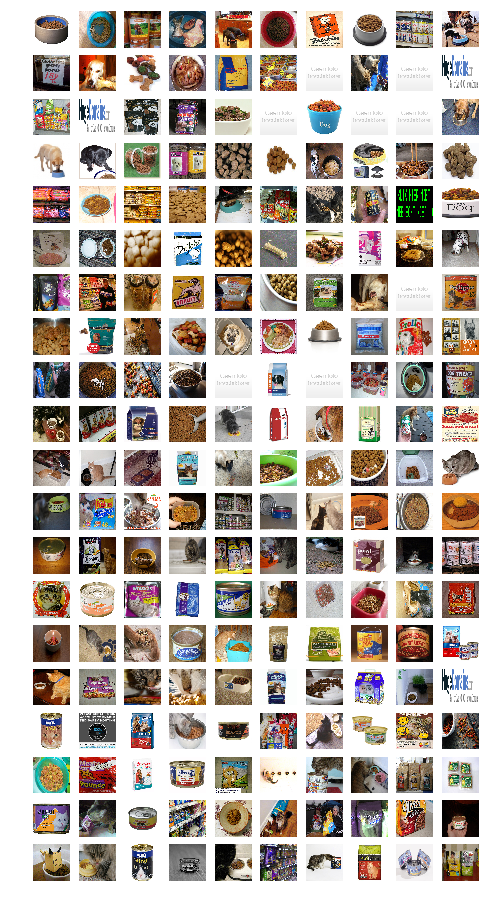

In [10]:
# Let's see some of the images
ncols = 10
nrows = 20
fig, axes = plt.subplots(figsize=(8,16), ncols=ncols, nrows=nrows)
for i, im in enumerate(imgs):
    axes[i//ncols][i%ncols].imshow(im.astype(np.uint8))
    axes[i//ncols][i%ncols].axis('off')

## Let's save data to npz file format for easily load later

In [11]:
# Labling Dog Food as 0, Cat Food as 1
labels = np.empty(0, int)
labels = np.append(labels, np.zeros(100), axis=0)
labels = np.append(labels, np.ones(100), axis=0)

In [12]:
np.savez_compressed('dog_cat_food.npz', features=imgs, labels=labels)

Now we can use this file to train a NN network.